# Traitement, Visualisation et Analyse des données

*Auteurs : Sylvia P. et Fabio G. C.* 

## Import des bibliothèques

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

## Importation des fichiers *crédit immo*

### Format CSV

In [2]:
cd_immo = pd.read_csv("./base_donnees/credit_immo/credit_immo.csv")

cd_immo.head() # afficher les 5 premières lignes

,ID_NOM,Niv_Etude_Bac,age,contrat_de_travail,Salaire,dette_anterieure,etat_civile,apport,enfant_a_Charge,Solvable
0,jean,3.0,45,CDI,40000,4000,M,0.3,3.0,OUI
1,VANESSA,5.0,28,CDI,30500,1320,M,0.1,0.0,OUI
2,TARCISSE,0.0,55,CDI,28000,40000,C,0.0,0.0,NON
3,TIBAULT,4.0,23,CDD,15000,0,M,0.1,NaN,OUI
4,GILES,0.0,33,CDD,27000,3000,C,0.1,2.0,NON


### Format XLS

In [3]:
cd_immo_excel = pd.read_excel("./base_donnees/credit_immo/credit_immo.xls")

cd_immo_excel.head() # afficher les 5 premières lignes

,ID_NOM,Niv_Etude_Bac,age,contrat_de_travail,Salaire,dette_anterieure,etat_civile,apport,enfant_a_Charge,Solvable
0,jean,3.0,45,CDI,40000,4000,M,0.3,3.0,OUI
1,VANESSA,5.0,28,CDI,30500,1320,M,0.1,0.0,OUI
2,TARCISSE,0.0,55,CDI,28000,40000,C,0.0,0.0,NON
3,TIBAULT,4.0,23,CDD,15000,0,M,0.1,NaN,OUI
4,GILES,0.0,33,CDD,27000,3000,C,0.1,2.0,NON


###  Format JSON

In [4]:
cd_immo_json = pd.read_json("./base_donnees/credit_immo/credit_immo.json")

cd_immo_json.head() # afficher les 5 premières lignes

,Salaire,ID_NOM,dette_anterieure,apport,contrat_de_travail,enfant_a_Charge,etat_civile,Solvable,age,Niv_Etude_Bac
0,40000,jean,4000,0.3,CDI,3,M,OUI,45,3
1,30500,VANESSA,1320,0.1,CDI,0,M,OUI,28,5
2,28000,TARCISSE,40000,0.0,CDI,0,C,NON,55,0
3,15000,TIBAULT,0,0.1,CDD,,M,OUI,23,4
4,27000,GILES,3000,0.1,CDD,2,C,NON,33,0


## Création d'une base de données

In [5]:
data_bd = np.random.randn(6, 4) # données aléatoire suivant une loi normal sur 6 lignes et 4 colonnes

print(data_bd) # affichage de data_bd

[[-0.11783604 -2.02614212  0.26941584 -0.70976008]
 [-0.29531136 -1.23478919 -0.59116703 -0.60821558]
 [-0.15045563 -2.97848923  0.4995499   0.76706817]
 [ 1.69361292  1.03066675 -0.24893216  0.3275228 ]
 [ 0.15625908  0.01832717  1.33223439 -0.13603613]
 [-0.21826519 -2.30256994 -0.5898796   0.85132512]]


In [6]:
label_col = ["taux_de_ventes", "croissance_vente", "ratio_benefice", "ratio_perte"] # nom des colonnes

In [7]:
bd = pd.DataFrame(data_bd, columns=label_col) # Création du dataframe

bd.head() # afficher les 5 premières lignes

,taux_de_ventes,croissance_vente,ratio_benefice,ratio_perte
0,-0.117836,-2.026142,0.269416,-0.709760
1,-0.295311,-1.234789,-0.591167,-0.608216
2,-0.150456,-2.978489,0.499550,0.767068
3,1.693613,1.030667,-0.248932,0.327523
4,0.156259,0.018327,1.332234,-0.136036


### Ajout de deux index vide

In [8]:
bd = bd.reindex([7,0,1,2,3,4,5,6]) # Ajout d'un index 7 en début de dataframe et d'un index 6 en fin de dataframe

### Localisation des données null

In [9]:
bd.isnull()

,taux_de_ventes,croissance_vente,ratio_benefice,ratio_perte
7,True,True,True,True
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
5,False,False,False,False
6,True,True,True,True


### Remplacement des valeurs nulles par 0

In [10]:
bd.fillna(0)

,taux_de_ventes,croissance_vente,ratio_benefice,ratio_perte
7,0.000000,0.000000,0.000000,0.000000
0,-0.117836,-2.026142,0.269416,-0.709760
1,-0.295311,-1.234789,-0.591167,-0.608216
2,-0.150456,-2.978489,0.499550,0.767068
3,1.693613,1.030667,-0.248932,0.327523
4,0.156259,0.018327,1.332234,-0.136036
5,-0.218265,-2.302570,-0.589880,0.851325
6,0.000000,0.000000,0.000000,0.000000


### Suppression des lignes nulles

In [11]:
bd = bd.dropna()

In [12]:
bd

,taux_de_ventes,croissance_vente,ratio_benefice,ratio_perte
0,-0.117836,-2.026142,0.269416,-0.709760
1,-0.295311,-1.234789,-0.591167,-0.608216
2,-0.150456,-2.978489,0.499550,0.767068
3,1.693613,1.030667,-0.248932,0.327523
4,0.156259,0.018327,1.332234,-0.136036
5,-0.218265,-2.302570,-0.589880,0.851325


## Traitement des données

### Imporation des bibliothèques nécessaires

In [13]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

### Importation du jeu de données

In [14]:
cd_immo = pd.read_csv("./base_donnees/credit_immo/credit_immo.csv")

In [15]:
cd_immo.head()

,ID_NOM,Niv_Etude_Bac,age,contrat_de_travail,Salaire,dette_anterieure,etat_civile,apport,enfant_a_Charge,Solvable
0,jean,3.0,45,CDI,40000,4000,M,0.3,3.0,OUI
1,VANESSA,5.0,28,CDI,30500,1320,M,0.1,0.0,OUI
2,TARCISSE,0.0,55,CDI,28000,40000,C,0.0,0.0,NON
3,TIBAULT,4.0,23,CDD,15000,0,M,0.1,NaN,OUI
4,GILES,0.0,33,CDD,27000,3000,C,0.1,2.0,NON


### Transformation des valeurs manquantes

In [16]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
# imputer = imputer.fit(cd_immo.select_dtypes(include='number'))

cd_immo[cd_immo.select_dtypes(include='number').columns] = imputer.fit_transform(cd_immo.select_dtypes(include='number'))

In [17]:
cd_immo.head()

,ID_NOM,Niv_Etude_Bac,age,contrat_de_travail,Salaire,dette_anterieure,etat_civile,apport,enfant_a_Charge,Solvable
0,jean,3.0,45.0,CDI,40000.0,4000.0,M,0.3,3.000000,OUI
1,VANESSA,5.0,28.0,CDI,30500.0,1320.0,M,0.1,0.000000,OUI
2,TARCISSE,0.0,55.0,CDI,28000.0,40000.0,C,0.0,0.000000,NON
3,TIBAULT,4.0,23.0,CDD,15000.0,0.0,M,0.1,1.333333,OUI
4,GILES,0.0,33.0,CDD,27000.0,3000.0,C,0.1,2.000000,NON


### Encoder les valeurs catégoriques

In [18]:
cd_immo.select_dtypes(include='object') # sélectionner les colonnes objet 

,ID_NOM,contrat_de_travail,etat_civile,Solvable
0,jean,CDI,M,OUI
1,VANESSA,CDI,M,OUI
2,TARCISSE,CDI,C,NON
3,TIBAULT,CDD,M,OUI
4,GILES,CDD,C,NON
5,ETHAN,INTERIM,M,NON
6,LILIANE,CDI,C,NON
7,GLODI,INTERIM,C,NON
8,FLORIANE,CDI,M,OUI
9,MARIE,CDI,M,OUI


In [19]:
label_categ = cd_immo.select_dtypes(include='object').columns # récupération des noms des colonnes objet
print(label_categ)

Index(['ID_NOM', 'contrat_de_travail', 'etat_civile', 'Solvable'], dtype='object')


In [20]:
labelE = LabelEncoder() # attribution fonction LabelEncoder() à la variable labelE

In [21]:
for i in label_categ[1:]: # Boucle pour traiter les différentes colonne, car la fonction prend uniquement les arrya 1D
    cd_immo[i] = labelE.fit_transform(cd_immo[i])

In [22]:
cd_immo.head() # afficher les 5 premières lignes

,ID_NOM,Niv_Etude_Bac,age,contrat_de_travail,Salaire,dette_anterieure,etat_civile,apport,enfant_a_Charge,Solvable
0,jean,3.0,45.0,1,40000.0,4000.0,1,0.3,3.000000,1
1,VANESSA,5.0,28.0,1,30500.0,1320.0,1,0.1,0.000000,1
2,TARCISSE,0.0,55.0,1,28000.0,40000.0,0,0.0,0.000000,0
3,TIBAULT,4.0,23.0,0,15000.0,0.0,1,0.1,1.333333,1
4,GILES,0.0,33.0,0,27000.0,3000.0,0,0.1,2.000000,0


### Mise à l’échelle des features

In [23]:
x = StandardScaler().fit_transform(cd_immo.iloc[:,1:-1])

### Fractionner le jeu de données pour l’entrainement et le test

In [24]:
X_train, X_test, y_train, y_test = train_test_split(x, cd_immo["Solvable"], test_size=0.2)

In [25]:
print("Taille de X_train :", len(X_train))
print("Taille de X_test :", len(X_test))

Taille de X_train : 15
Taille de X_test : 4


## Visualisation de données

#### Chargement des données

In [26]:
data_montant = pd.read_csv("./base_donnees/Montant_Temps.csv")
data_montant.head()

,Montant_du_capitale,Temps
0,1,5
1,12,6
2,13,7
3,2,8
4,3,9


#### Séparation des données en abscisses et ordonnées

In [27]:
x = data_montant.iloc[:,1] # Valeurs d'abscisses
y = data_montant.iloc[:,0] # Valeurs d'ordonnées

#### Tracer les données

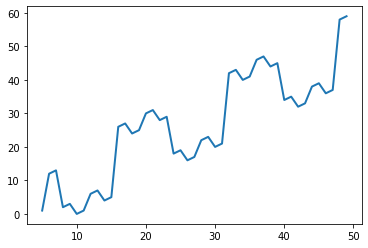

In [28]:
ax = plt.plot(x,y, linewidth=2) # réalisation du plot (graphique) de y en fonction de x
plt.show() # affichage du plot

In [29]:
plt.savefig("./Figures/ligne.png") # Sauvegarde du graphique

<Figure size 432x288 with 0 Axes>

###  Rajoutez du style à vos graphiques

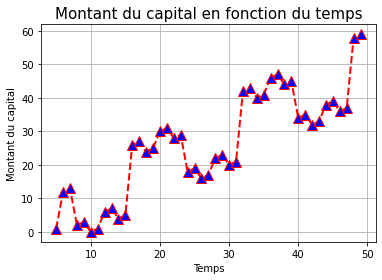

In [30]:
plt.plot(x,y, linewidth=2, color="red", linestyle = "dashed", marker="^", markersize=10, markerfacecolor="blue")
plt.title("Montant du capital en fonction du temps", fontsize=15) # Ajout d'un titre
plt.xlabel("Temps") # Ajout du nom de l'axe des x
plt.ylabel("Montant du capital") # Ajout du nom de l'axe des y
plt.grid(visible=True) # Activation de la grille
plt.show() # Affichage de la représentation

In [31]:
plt.savefig("./Figures/ligne_personnalise.png") # Sauvegarde du graphique

<Figure size 432x288 with 0 Axes>

### Visualisation de données sous forme de nuage de points

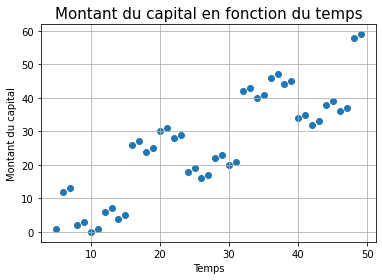

In [32]:
plt.scatter(x, y) # Création d'un nuage depoint, de y en fonction de x
plt.title("Montant du capital en fonction du temps", fontsize=15) # Ajout d'un titre
plt.xlabel("Temps") # Ajout de nom de l'axe X
plt.ylabel("Montant du capital")# Ajout de l'axe Y
plt.grid(visible=True) # Activation de la grille
plt.show() # Affichage du plot

In [33]:
plt.savefig("./Figures/nuage_point.png") # Sauvegarde du graphique

<Figure size 432x288 with 0 Axes>

## Analyse de données

### Mesure de tendance centrale

#### Chargement des données

In [34]:
data_tc = pd.read_csv("./base_donnees/tendance_centrale.csv") # Chargement des données tendance_centrale.csv

In [35]:
data_tc.head() # afficher les 5 premières lignes

,Nom,Age,Rating
0,ANATOLE,55,4.53
1,Vincent,59,3.54
2,Brenda,55,3.98
3,Philippe,53,5.59
4,Michel,30,3.50


#### Analyse descriptive et des modes

In [36]:
data_tc.describe() # Analyse descriptive du jeu de données tendance centrale

,Age,Rating
count,17.000000,17.000000
mean,45.647059,4.438824
std,10.723462,0.800390
min,30.000000,3.500000
25%,34.000000,3.800000
50%,49.000000,4.300000
75%,53.000000,4.800000
max,59.000000,5.980000


In [37]:
data_tc.mode() # Calcul des modes (les valeurs les plus fréquente) du jeu de données

,Nom,Age,Rating
0,perez,53.0,3.78
1,NaN,NaN,3.95
2,NaN,NaN,4.30
3,NaN,NaN,4.80
4,NaN,NaN,5.98


Ici la valeur la plus fréquente parmi le **Nom** est *Perez*, l'**Age** le plus fréquent est *53*, et plusieurs valeurs **Rating** (5) sont représenté 2 fois.

### Analyse de la variance

On cherche ici a vérifier si l'age des personnes a une relation particulière avec le rating.
On emet donc les deux hypothèses suivantes :  
    - **H0** : Hypothèse nulle, on suppose que les échantillons sont issus d'une même population.  
    - **H1** : On suppose que chaque échantillon analysé est indépendant des autres échantillons.

In [38]:
data_tc

,Nom,Age,Rating
0,ANATOLE,55,4.53
1,Vincent,59,3.54
2,Brenda,55,3.98
3,Philippe,53,5.59
4,Michel,30,3.50
5,Tillier,59,4.90
6,Blanchard,53,3.80
7,perez,34,3.78
8,théo,40,5.98
9,cyprien,30,4.80


In [39]:
F, p_value = stats.f_oneway(data_tc["Age"], data_tc["Rating"])
print("La valeur de statistique F est : " + str(F))
print("La valeur de p_value associée est : " + str(p_value))

La valeur de statistique F est : 249.65148011543107
La valeur de p_value associée est : 1.1416831449220863e-16


La valeur de de p est inférieur au seuil de 0,05 on peut donc rejeté l'hypothèse H0. Il s'emblerait donc y avoir une influence de l'**Age** sur le **Rating**.

Test ANOVA depuis la bibliothèque statsmodels :

In [40]:
import statsmodels.formula.api
import statsmodels.api

In [41]:
fit = statsmodels.formula.api.ols('Rating ~ Age', data = data_tc).fit()
table = statsmodels.api.stats.anova_lm(fit)
table

,df,sum_sq,mean_sq,F,PR(>F)
Age,1.0,0.049125,0.049125,0.072237,0.791769
Residual,15.0,10.200851,0.680057,NaN,NaN


La valeur de de p est supérieur au seuil de 0,05 on peut donc accepter l'hypothèse H0. Il n'y a donc aucune infuence de l'**Age** sur le **Rating**.

### Analyse de corrélations

####  Charrgement des données

In [42]:
data_iris = pd.read_csv("./base_donnees/iris.csv")

In [43]:
data_iris.head() # Affichage des 5 premières lignes des données iris

,longueur_sepal,largeur_sepal,longueur_petal,largeur_petal,espece
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#### Analyse graphique 

Réalisation de graphique nuage de point, pour visualiser l'allure du jeu de donnée. Dans un premier temps on cherche a déterminer le nombre d'espèces différentes présente dans le jeux de données.

In [44]:
len(data_iris["espece"].unique())

3

Ce qui nous permet de créer liste contenant une couleur par catégorie, ce qui pourra nous être utile pour la suite.

In [45]:
legende_especes = data_iris["espece"].unique()
print(legende_especes)

['setosa' 'versicolor' 'virginica']


In [46]:
label_especes = labelE.fit_transform(data_iris["espece"])
data_iris["label"] = label_especes
data_iris.head()

,longueur_sepal,largeur_sepal,longueur_petal,largeur_petal,espece,label
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


In [47]:
couleur_cat = np.array(['r','g','b'])

On peut alors tracer la visualisation des donées avec 1 couleur pour chaque espèce. Naturellement on a tendance à associer la *longueur_sepal* à le *largeur_sepal*, ainsi que la *longueur_petal* à la *largeur_petal*.

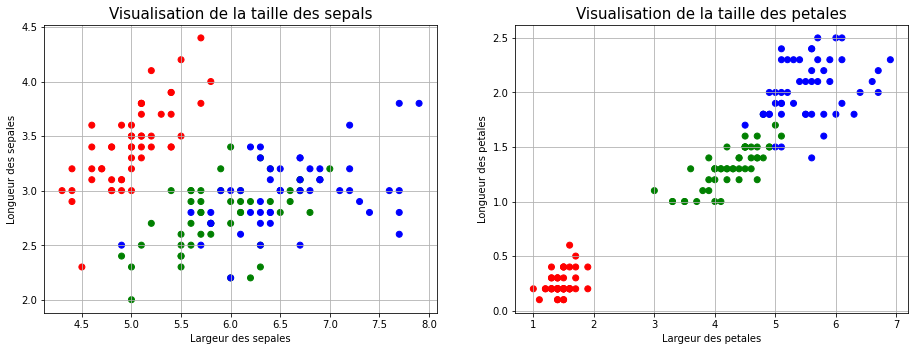

In [48]:
fig, (ax1, ax2) = plt.subplots(1, 2)

# ax1 = plt.subplot(121)
ax1.scatter(data_iris["longueur_sepal"], data_iris["largeur_sepal"], c=couleur_cat[label_especes])
ax1.set_title("Visualisation de la taille des sepals", fontsize = 15)
ax1.set_xlabel("Largeur des sepales")
ax1.set_ylabel("Longueur des sepales")
ax1.grid(True)

# ax2 = plt.subplot(122)
ax2.scatter(data_iris["longueur_petal"], data_iris["largeur_petal"], c=couleur_cat[label_especes])
ax2.set_title("Visualisation de la taille des petales", fontsize = 15)
ax2.set_xlabel("Largeur des petales")
ax2.set_ylabel("Longueur des petales")
ax2.grid(True)

plt.subplots_adjust(left = 0,
           bottom = 0,
           right = 2, # Largeur du graphique
           top = 1, # Hauteur du graphique
           wspace = 0.2,
           hspace = 0)

plt.savefig("./Figures/nuage_point_especes.png")
plt.show()

*Remarque : Il manque les légendes, pour les ajouter facilement on aurait pu isoler les valeurs de chaque catégories et réaliser ensuite trois nuages de points superposés. Ici nous avons uniquement cherché à visualiser rapidement les données.*

Au vu des deux graphiques obtenu il semblerait que la taille des sépales d'une des trois espèces se distingue des deux autres. Cette hypothèse est également visible avec la taille des petales. La taille des petales semble également distinguer les deux autres espèces.

On peut également représenter les autres paramètres entre eux, pour se faire on peut réaliser une boucle pour représenter tous les subplots :

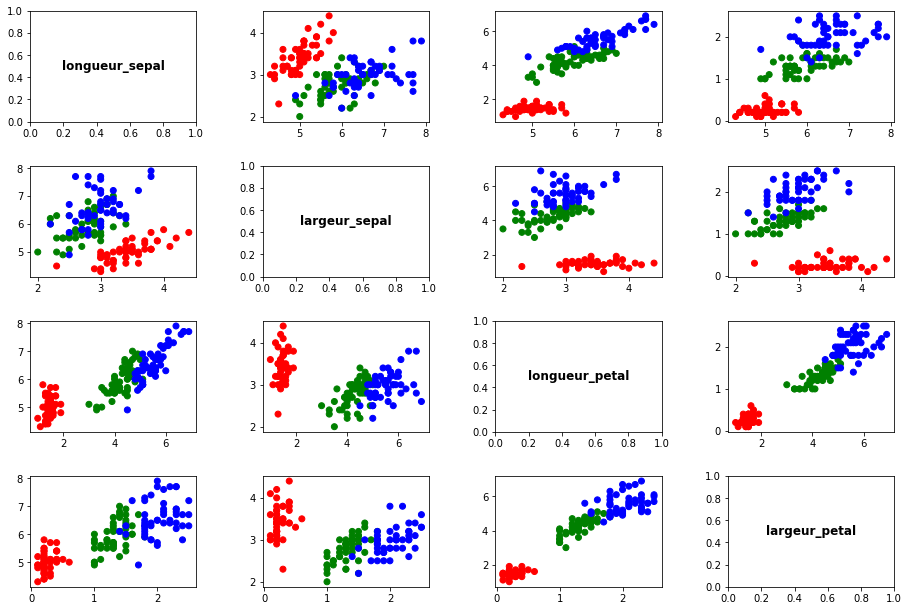

In [49]:
xy = len(data_iris.columns[:-1])
fig, axs = plt.subplots(xy-1, xy-1)

for y, p2 in zip(data_iris.columns[:-2], range(xy)):
    for x, p1 in zip(data_iris.columns[:-2], range(xy)):
        if y != x :
            axs[p1, p2].scatter(data_iris[x], data_iris[y], c=couleur_cat[label_especes])
        else:
            axs[p1, p2].text(0.5, 0.5, y, ha="center", va="center", fontsize="large", fontweight="bold")

plt.subplots_adjust(left = 0,
           bottom = 0,
           right = 2, # Largeur du graphique
           top = 2, # Hauteur du graphique
           wspace = 0.4,
           hspace = 0.4)
            
plt.show()

Ce graphique peut également être obtenus par la fonction sns.pairplot de la bibliothèque seaborn :

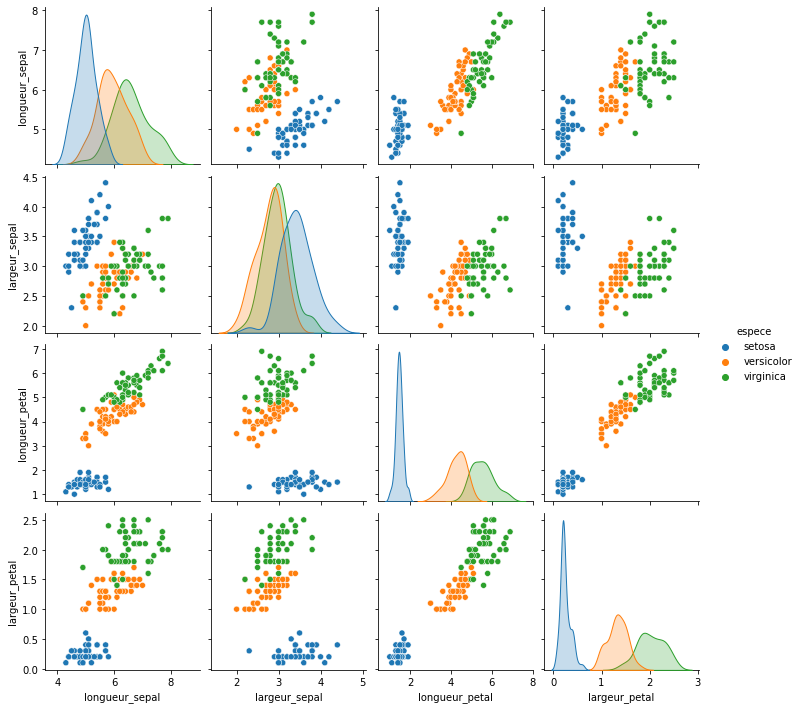

In [50]:
import seaborn as sns

sns.pairplot(data_iris, hue='espece',vars=data_iris.columns[:-2])

#### Analyse mathématique

Correlation des données par fonction corr de la bibliothèque pandas

<AxesSubplot:>

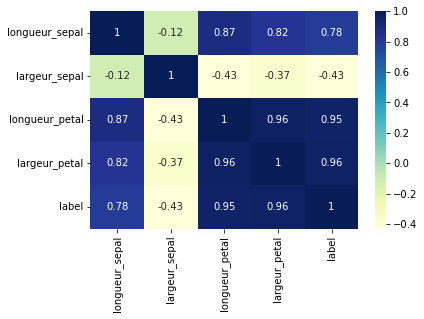

In [60]:
sns.heatmap(data_iris.corr(method="pearson"), annot=True,cmap="YlGnBu")

Pour calculer la valeur r et la p_value associé on utilisation de scipy, avec la fonction pearsonr :

In [52]:
# Calcul de la valeur r et p entre les variable largeur_sepal et longueur_sepal
r_sepal, p_sepal = stats.pearsonr(data_iris["largeur_sepal"],data_iris["longueur_sepal"])
print("La valeur r est de : " + str(r_sepal))
print("La valeur p est de : " + str(p_sepal))

La valeur r est de : -0.11756978413300204
La valeur p est de : 0.15189826071144918


D'après les résultats obtenus, la correlation de Pearson nous renvoie une valeur *r* de -0.11, soit une valeur négative et se rapprochant de 0. On a également *p_value* de 0.15. Cette dernière étant supérieur au seuil de 0.05, on peut accepter l'hypothèse nulle, disant qu'il n'y a pas de correlation linéaire entre la largeur et la longueur des sépales. 

In [53]:
# Calcul de la valeur r et p entre les variable largeur_petal et longueur_petal
r_petal, p_petal = stats.pearsonr(data_iris["largeur_petal"],data_iris["longueur_petal"])
print("La valeur r est de : " + str(r_petal))
print("La valeur p est de : " + str(p_petal))

La valeur r est de : 0.962865431402796
La valeur p est de : 4.6750039073285846e-86


D'après les résultats obtenus, la correlation de Pearson nous renvoie une valeur *r* de 0.96, soit une valeur très de 1. On a également *p_value* de 4.68e-86. Cette dernière étant très inférieur au seuil de 0.05, on peut rejeter l'hypothèse nulle. Il semblerait donc qu'il y a une correlation linéaire positive entre la largeur et la longueur des petales. 

In [54]:
# Calcul de la valeur r et p entre les variable largeur_petal et longueur_petal
r_petal, p_petal = stats.pearsonr(data_iris["largeur_sepal"],data_iris["longueur_petal"])
print("La valeur r est de : " + str(r_petal))
print("La valeur p est de : " + str(p_petal))

La valeur r est de : -0.4284401043305397
La valeur p est de : 4.5133142672730875e-08


D'après les résultats obtenus, la correlation de Pearson nous renvoie une valeur r de -0.43. On a également p_value de 4.51e-8. Cette dernière étant très inférieur au seuil de 0.05, on peut rejeter l'hypothèse nulle. Il semblerait donc qu'il y a une légère correlation linéaire negative entre la largeur des sepales et la longueur des petales. 

In [55]:
# Calcul de la valeur r et p entre les variable largeur_petal et longueur_petal
r_petal, p_petal = stats.pearsonr(data_iris["longueur_sepal"],data_iris["largeur_petal"])
print("La valeur r est de : " + str(r_petal))
print("La valeur p est de : " + str(p_petal))

La valeur r est de : 0.8179411262715757
La valeur p est de : 2.325498079793167e-37


D'après les résultats obtenus, la correlation de Pearson nous renvoie une valeur r de 0.82. On a également p_value de 2.33e-37. Cette dernière étant très inférieur au seuil de 0.05, on peut rejeter l'hypothèse nulle. Il semblerait donc qu'il y a une correlation linéaire positive entre la longueur des sepales et la largeur des petales. 

In [56]:
# Calcul de la valeur r et p entre les variable largeur_petal et longueur_petal
r_petal, p_petal = stats.pearsonr(data_iris["longueur_sepal"],data_iris["longueur_petal"])
print("La valeur r est de : " + str(r_petal))
print("La valeur p est de : " + str(p_petal))

La valeur r est de : 0.8717537758865832
La valeur p est de : 1.0386674194497525e-47


D'après les résultats obtenus, la correlation de Pearson nous renvoie une valeur r de 0.87. On a également p_value de 1.04e-47. Cette dernière étant très inférieur au seuil de 0.05, on peut rejeter l'hypothèse nulle. Il semblerait donc qu'il y a une correlation linéaire positive entre la longueur des sepales et la longueur des petales. 

In [57]:
# Calcul de la valeur r et p entre les variable largeur_petal et longueur_petal
r_petal, p_petal = stats.pearsonr(data_iris["largeur_sepal"],data_iris["largeur_petal"])
print("La valeur r est de : " + str(r_petal))
print("La valeur p est de : " + str(p_petal))

La valeur r est de : -0.3661259325364391
La valeur p est de : 4.0732285132461925e-06


D'après les résultats obtenus, la correlation de Pearson nous renvoie une valeur r de -0.37. On a également p_value de 4.07e-06. Cette dernière étant très inférieur au seuil de 0.05, on peut rejeter l'hypothèse nulle. Il semblerait donc qu'il y a une légère correlation linéaire negative entre la largeur des sepales et la largeur des petales. 